In [130]:
import osmnx as ox
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import mapping, Polygon

<Axes: >

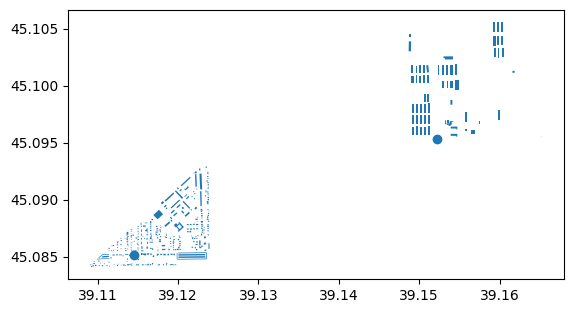

In [11]:
place_name = "Loris, Krasnodar"
tags = {'building': True}   

buildings = ox.features_from_place(place_name, tags)
buildings.plot()

In [61]:
place_name = "Krasnodar"
tags = {'amenity': 'school'}
schools = ox.features_from_place(place_name, tags)

schools.columns

Index(['amenity', 'name', 'geometry', 'wheelchair', 'barrier', 'opening_hours',
       'source', 'name:ru', 'office', 'name:en', 'phone', 'website',
       'description', 'operator', 'email', 'contact:phone', 'contact:website',
       'addr:city', 'addr:housenumber', 'addr:street', 'nodes', 'alt_name',
       'contact:email', 'official_name', 'fenced', 'addr:country',
       'addr:postcode', 'grades', 'ref', 'religion', 'start_date', 'building',
       'building:levels', 'ownership', 'addr2:housenumber', 'addr2:street',
       'int_name', 'fire_operator', 'fire_rank', 'building:colour', 'fee',
       'roof:shape', 'sport', 'opening_date', 'short_name', 'ways', 'type',
       'education', 'education_form:fulltime', 'education_level:primary',
       'education_level:secondary', 'education_profile:general',
       'education_system:ru_standard'],
      dtype='object')

In [62]:
schools[["addr:city", "addr:housenumber", "addr:street", "addr2:housenumber", "addr2:street"]]

addr:city addr:housenumber addr:street  \
element_type osmid                                               
node         494274319        NaN              NaN         NaN   
             623632386        NaN              NaN         NaN   
             1707977025       NaN              NaN         NaN   
             2476385106       NaN              NaN         NaN   
             4841277021       NaN              NaN         NaN   
...                           ...              ...         ...   
relation     9063317          NaN              NaN         NaN   
             9385210          NaN              NaN         NaN   
             9449334          NaN              NaN         NaN   
             13290338         NaN              NaN         NaN   
             17097884         NaN              NaN         NaN   

                        addr2:housenumber addr2:street  
element_type osmid                                      
node         494274319                NaN          NaN  
             623632386                NaN          NaN  
             1707977025               NaN          NaN  
             2476385106               NaN          NaN  
             4841277021               NaN          NaN  
...                                   ...          ...  
relation     9063317                  NaN          NaN  
             9385210                  NaN          NaN  
             9449334                  NaN          NaN  
             13290338                 NaN          NaN  
             17097884                 NaN          NaN  

[131 rows x 5 columns]

In [78]:
schools

amenity                                         name  \
element_type osmid                                                             
node         494274319   school                               Школа искусств   
             623632386   school  Детская школа искусств им. Г.Ф. Пономаренко   
             1707977025  school                             Автошкола СТАР-Т   
             2476385106  school                            Школа искусств №5   
             4841277021  school                             Балетное училище   
...                         ...                                          ...   
relation     9063317     school                                    Школа №25   
             9385210     school                                    Школа №31   
             9449334     school                                    Лицей №48   
             13290338    school                                   Школа №108   
             17097884    school                                   Школа №102   

                                                                  geometry  \
element_type osmid                                                           
node         494274319                           POINT (38.91786 45.03889)   
             623632386                           POINT (38.97352 45.02473)   
             1707977025                          POINT (38.91705 45.03494)   
             2476385106                          POINT (39.02172 45.05446)   
             4841277021                          POINT (38.96998 45.02921)   
...                                                                    ...   
relation     9063317     POLYGON ((38.97529 45.04512, 38.97546 45.04557...   
             9385210     POLYGON ((38.96093 45.01361, 38.96060 45.01366...   
             9449334     POLYGON ((38.96956 45.01489, 38.96972 45.01540...   
             13290338    POLYGON ((39.12480 45.06926, 39.12221 45.06927...   
             17097884    POLYGON ((39.03955 45.07334, 39.03880 45.07334...   

                        wheelchair barrier opening_hours source  \
element_type osmid                                                
node         494274319         NaN     NaN           NaN    NaN   
             623632386         NaN     NaN           NaN    NaN   
             1707977025        NaN     NaN           NaN    NaN   
             2476385106        NaN     NaN           NaN    NaN   
             4841277021        NaN     NaN           NaN    NaN   
...                            ...     ...           ...    ...   
relation     9063317           NaN   fence           NaN    NaN   
             9385210           NaN   fence           NaN    NaN   
             9449334           NaN     NaN           NaN    NaN   
             13290338          NaN     NaN           NaN    NaN   
             17097884          NaN     NaN           NaN    NaN   

                                  name:ru office name:en  ... opening_date  \
element_type osmid                                        ...                
node         494274319                NaN    NaN     NaN  ...          NaN   
             623632386                NaN    NaN     NaN  ...          NaN   
             1707977025               NaN    NaN     NaN  ...          NaN   
             2476385106               NaN    NaN     NaN  ...          NaN   
             4841277021  Балетное училище    NaN     NaN  ...          NaN   
...                                   ...    ...     ...  ...          ...   
relation     9063317                  NaN    NaN     NaN  ...          NaN   
             9385210                  NaN    NaN     NaN  ...          NaN   
             9449334                  NaN    NaN     NaN  ...          NaN   
             13290338                 NaN    NaN     NaN  ...          NaN   
             17097884                 NaN    NaN     NaN  ...          NaN   

                            short_name                               ways  \
elem

In [35]:
geolocator = Nominatim(user_agent="xstratumm")
location = geolocator.reverse((45.03889, 38.91786), exactly_one=True)
location.address

'2, Алма-Атинская улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350004, Россия'

In [63]:
schools.get_coordinates()

x          y
element_type osmid                           
node         494274319   38.917856  45.038892
             623632386   38.973517  45.024728
             1707977025  38.917049  45.034940
             2476385106  39.021715  45.054455
             4841277021  38.969976  45.029210
...                            ...        ...
relation     17097884    39.040343  45.075880
             17097884    39.040417  45.075881
             17097884    39.040452  45.074669
             17097884    39.039526  45.074659
             17097884    39.039554  45.073344

[1295 rows x 2 columns]

In [87]:
set(element[0] for element in schools.axes[0].values)

{'node', 'relation', 'way'}

In [81]:
schools[schools.index.isin(["way"], level=0)]

amenity        name  \
element_type osmid                            
way          30885238    school   Школа №47   
             30909333    school   Школа №35   
             31736228    school   Лицей №12   
             31789171    school   Школа №32   
             34235702    school   Школа №30   
...                         ...         ...   
             1227169780  school  Школа №107   
             1227997071  school   Школа №97   
             1230627618  school         NaN   
             1230826610  school         NaN   
             1236112959  school         NaN   

                                                                  geometry  \
element_type osmid                                                           
way          30885238    POLYGON ((38.99604 45.05161, 38.99610 45.05073...   
             30909333    POLYGON ((38.98559 45.03017, 38.98524 45.03024...   
             31736228    POLYGON ((38.98908 45.02136, 38.98862 45.02190...   
             31789171    POLYGON ((38.99895 45.01852, 38.99893 45.01848...   
             34235702    POLYGON ((39.00597 45.03513, 39.00767 45.03488...   
...                                                                    ...   
             1227169780  POLYGON ((38.99047 45.14384, 38.99047 45.14345...   
             1227997071  POLYGON ((38.96157 45.10904, 38.96188 45.11043...   
             1230627618  POLYGON ((38.90152 45.09760, 38.90275 45.09896...   
             1230826610  POLYGON ((38.90811 45.10241, 38.90683 45.10100...   
             1236112959  POLYGON ((38.98869 45.04838, 38.98976 45.04843...   

                        wheelchair barrier opening_hours source name:ru  \
element_type osmid                                                        
way          30885238          NaN   fence           NaN    NaN     NaN   
             30909333          NaN   fence           NaN    NaN     NaN   
             31736228          NaN   fence           NaN    NaN     NaN   
             31789171          NaN   fence           NaN    NaN     NaN   
             34235702          NaN   fence           NaN    NaN     NaN   
...                            ...     ...           ...    ...     ...   
             1227169780        NaN   fence           NaN    NaN     NaN   
             1227997071        NaN     NaN           NaN    NaN     NaN   
             1230627618        NaN     NaN           NaN    NaN     NaN   
             1230826610        NaN     NaN           NaN    NaN     NaN   
             1236112959        NaN     NaN           NaN    NaN     NaN   

                        office name:en  ... opening_date short_name ways type  \
element_type osmid                      ...                                     
way          30885238      NaN     NaN  ...          NaN        NaN  NaN  NaN   
             30909333      NaN     NaN  ...          NaN        NaN  NaN  NaN   
             31736228      NaN     NaN  ...          NaN        NaN  NaN  NaN   
             31789171      NaN     NaN  ...          NaN        NaN  NaN  NaN   
             34235702      NaN     NaN  ...          NaN        NaN  NaN  NaN   
...                        ...     ...  ...          ...        ...  ...  ...   
             1227169780    NaN     NaN  ...          NaN        NaN  NaN  NaN   
             1227997071    NaN     NaN  ...          NaN        NaN  NaN  NaN   
             1230627618    NaN     NaN  ...          NaN        NaN  NaN  NaN   
             1230826610    NaN     NaN  ...          NaN        NaN  NaN  NaN   
             1236112959    NaN     NaN  ...          NaN        NaN  NaN  NaN   

                        education education_form:fulltime  \
element_type osmid                                          
way          30885238         NaN                     NaN   
             30909333         NaN                     NaN   
             31736228         NaN                     NaN   
             31789171         NaN                     NaN   
 

In [126]:
coords = mapping(schools[schools.index.isin(["way"], level=0)]["geometry"][0])['coordinates'][0]
avg = (0,0)
for el in coords:
    avg = (avg[0] + el[0], avg[1] + el[1])
avg
avg = list(map(lambda el: el / len(coords), avg))
avg[::-1]

[45.05094582499999, 38.99676414166667]

In [131]:
isinstance(schools[schools.index.isin(["way"], level=0)]["geometry"][0], Polygon)

True

In [142]:
set(list(map(type, schools["geometry"].values)))

{shapely.geometry.point.Point, shapely.geometry.polygon.Polygon}

In [185]:
schools_and_adresses = []

for i in range(len(schools)):
    row = schools[["name", "geometry"]].iloc[i]
    coords = mapping(row["geometry"])['coordinates']
    if isinstance(row["geometry"], Polygon):
        avg = (0,0)
        for el in coords[0]:
            # print(avg, el)
            avg = (avg[0] + el[0], avg[1] + el[1])
        avg = list(map(lambda el: el / len(coords[0]), avg))
        coords = avg
    coords = coords[::-1]
    schools_and_adresses.append((row["name"], geolocator.reverse(coords, exactly_one=True).address))

schools_and_adresses

[('Школа искусств',
  'Школа искусств, 2, Алма-Атинская улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350004, Россия'),
 ('Детская школа искусств им. Г.Ф. Пономаренко',
  'Детская школа искусств им. Г.Ф. Пономаренко, 38, Гимназическая улица, Центральный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия'),
 ('Автошкола СТАР-Т',
  '4, улица Думенко, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350089, Россия'),
 ('Школа искусств №5',
  'Школа искусств №5, 93/1, улица 1 Мая, Прикубанский округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350901, Россия'),
 ('Балетное училище',
  '64Б, Рашпилевская улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия'),
 ('Санкт-Петербургская школа телевидения',
  'Санкт-Петербургская 

In [188]:
for i in range(len(schools_and_adresses)):
    name = schools_and_adresses[i][0]
    if isinstance(name, str):
        schools_and_adresses[i] = (name, schools_and_adresses[i][1].replace(name + ", ", ""))

schools_and_adresses

[('Школа искусств',
  '2, Алма-Атинская улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350004, Россия'),
 ('Детская школа искусств им. Г.Ф. Пономаренко',
  '38, Гимназическая улица, Центральный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия'),
 ('Автошкола СТАР-Т',
  '4, улица Думенко, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350089, Россия'),
 ('Школа искусств №5',
  '93/1, улица 1 Мая, Прикубанский округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350901, Россия'),
 ('Балетное училище',
  '64Б, Рашпилевская улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия'),
 ('Санкт-Петербургская школа телевидения',
  '18, улица Островского, Центральный округ, Краснодар, городской округ Краснодар, Краснодарский край, 

In [189]:
schools_and_adresses.sort(key=lambda school: school[1])
schools_and_adresses

[('Школа №65',
  '1, Дорожная улица, Северный, Прикубанский округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350030, Россия'),
 ('Школа №82',
  '1, улица 30-й Иркутской Дивизии, Комсомольский, Карасунский округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350080, Россия'),
 ('Школа №53',
  '1-й Онежский проезд, Карасунский округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия'),
 ('Футбольный манеж ФК "Краснодар"',
  '1/7, улица Рождественская Набережная, Юбилейный, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350089, Россия'),
 ('Школа №5',
  '100, улица Котовского, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350049, Россия'),
 ('Школа №98 им. героя России Г.Н. Трошева',
  '100/1, улица Дзержинского, Прикубанский округ, Краснодар, городской округ Кр